# Principal Component Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
dataset = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
X = dataset.drop(columns=['target'],axis = 1)
Y = dataset['target']

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=10)

In [7]:
x_train.shape

(820, 13)

In [8]:
y_train.shape

(820,)

In [9]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC()

In [10]:
print('Accuracy with 13 features')
model.score(x_test,y_test)

Accuracy with 13 features


0.8926829268292683

In [11]:
del model

**Applying PCA**

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA().fit(x_train)

Text(0, 0.5, 'Variance Metric')

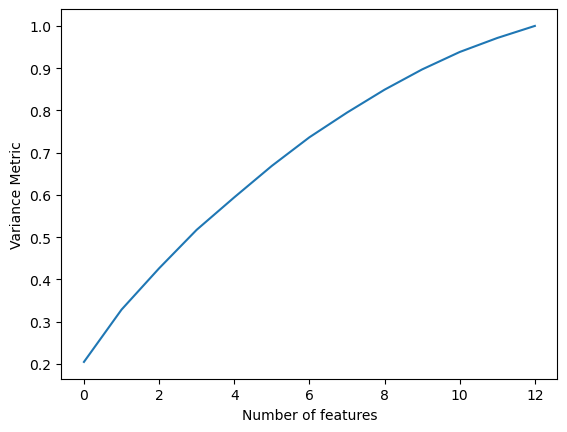

In [14]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of features')
plt.ylabel('Variance Metric')

As we reduce number of features i.e columns, we are reducing the variance of the dataset which leads to lower accuracy of the model

selecting number of features as 9 as it will be maintaining about 90% variance of the dataset 

In [15]:
pca = PCA(n_components = 9)

In [16]:
pca_X = pca.fit_transform(X_scaled)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(pca_X,Y,test_size=0.2,random_state = 10)

In [18]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC()

In [19]:
print('Model Accuracy with 9 features -')
model.score(x_test,y_test)

Model Accuracy with 9 features -


0.8878048780487805

# Conclusion

In [20]:
number_of_features = [1,2,3,4,5,6,7,8,9,10,11,12,13]
result = []
for alpha in number_of_features:
    pca = PCA(n_components = alpha)
    pca_X = pca.fit_transform(X_scaled)
    x_train,x_test,y_train,y_test = train_test_split(pca_X,Y,test_size=0.2,random_state = 10)
    model.fit(x_train,y_train)
    result.append(model.score(x_test,y_test))
    

In [21]:
print(result)

[0.7609756097560976, 0.8, 0.8146341463414634, 0.8439024390243902, 0.8439024390243902, 0.8682926829268293, 0.8682926829268293, 0.8829268292682927, 0.8878048780487805, 0.8926829268292683, 0.8975609756097561, 0.8926829268292683, 0.8926829268292683]


Text(0, 0.5, 'Accuracy')

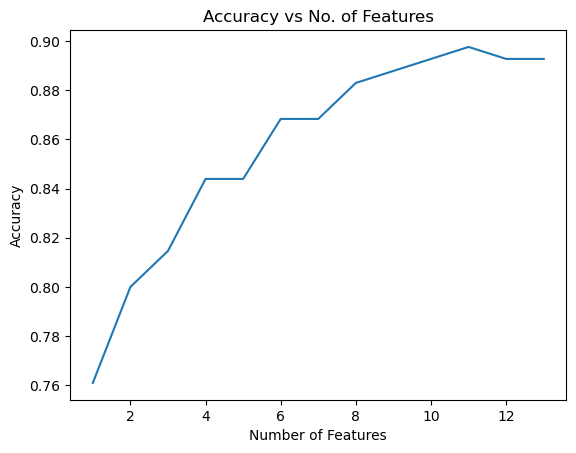

In [22]:
import seaborn as sns
sns.lineplot(x=number_of_features,y=result)
plt.title('Accuracy vs No. of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')